# Task-4

In [33]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import os
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

#### This used for the preprocessing of collected datset don't run this below code!!

In [46]:
# import os
# import pandas as pd
# from sklearn.preprocessing import MinMaxScaler

# # Set the path to the folder containing the CSV files
# folder_path = './Task 4 Datasets/Raw_Datasets'

# # Iterate over all files in the folder
# for filename in os.listdir(folder_path):
#     if filename.endswith('.csv'):
#         file_path = os.path.join(folder_path, filename)
        
#         # Read the CSV file
#         df = pd.read_csv(file_path)
        
#         # Drop the first and last columns
#         df = df.iloc[:, 1:-1]
        
#         # Trim the rows from 300 to 799 (indexing starts from 0)
#         df = df.iloc[299:799]
        
#         # Save the modified DataFrame back to the same file or a new file
#         df.to_csv(os.path.join('./Task 4 Datasets/Trimed_Datasets', filename), index=False)

# print("Processing complete!")


Processing complete!


In [53]:
import os
import pandas as pd
from sklearn.utils import shuffle


def Combining_Datasets(train_dir):
    # Activity mapping dictionary
    ACTIVITIES = {
        1: 'WALKING'            ,
        2: 'WALKING_UPSTAIRS'   ,
        3: 'WALKING_DOWNSTAIRS' ,
        4: 'SITTING'            ,
        5: 'STANDING'           ,
        6: 'LAYING'             ,
    }

    # Initialize empty DataFrames for X_train and y_train
    
    y_train = []
    X_train_combined = []
    for label in range(1,7):
        activity_folder = os.path.join(train_dir,ACTIVITIES[label])
        if os.path.exists(activity_folder):
        # Loop through each file in the activity folder
            for file in os.listdir(activity_folder):
                if file.endswith('.csv'):
                    # Read the CSV file
                    file_path = os.path.join(activity_folder, file)
                    df = pd.read_csv(file_path)
                    
                    # Combine the three columns into one using the formula column1^2 + column2^2 + column3^2
                    combined_column = df.iloc[:, 0]**2 + df.iloc[:, 1]**2 + df.iloc[:, 2]**2
                    
                    X_train_combined.append(combined_column)
                
                # Append the numeric label to y_train
                y_train.append(label)
        else:
            print(f"Directory not found: {activity_folder}")

    # Convert X_train_combined and y_train to DataFrames
    X_train_combined = pd.DataFrame(X_train_combined)
    y_train = pd.DataFrame(y_train)

    return X_train_combined,y_train



In [54]:
import joblib

def PreformanceDecisionTree(X_test,y_test,file):

    model = joblib.load(f'./Task_2 Models files/{file}')
    y_pred = model.predict(X_test)
    print(y_pred.shape)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    activity_mapping = {
        1: 'LAYING',
        2: 'SITTING',
        3: 'STANDING',
        4: 'WALKING',
        5: 'WALKING DOWNSTAIRS',
        6: 'WALKING UPSTAIRS'
    }
    

    conf_matrix = confusion_matrix(y_test, y_pred)

   

    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    
     # Plotting the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

## 4.1

(18,)
Accuracy: 0.1667
Precision: 0.0556
Recall: 0.1667


c:\Users\Shiva\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


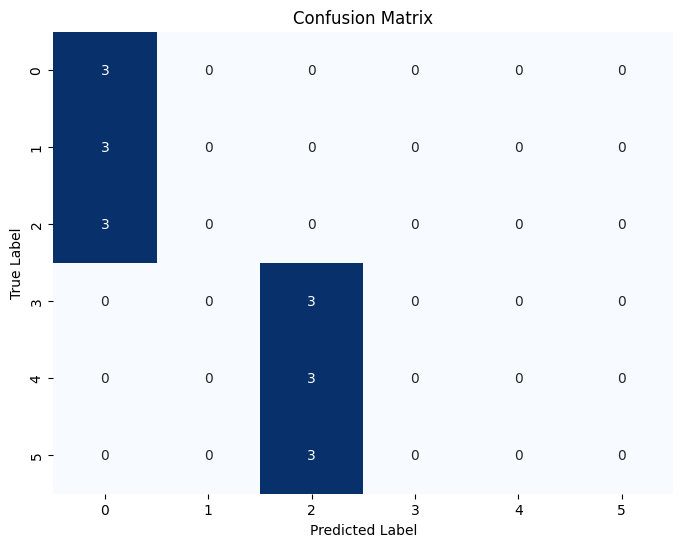

In [55]:
# Path to the Train directory
train_dir = os.path.abspath('Task 4 Datasets/4.1_Raw_Datasets/Train')
test_dir = os.path.abspath('Task 4 Datasets/4.1_Raw_Datasets/Test')
X_train_collected_data,y_train_collected_data = Combining_Datasets(train_dir)
X_test_collected_data, y_test_collected_data = Combining_Datasets(test_dir)

X_test_combined = pd.concat([X_train_collected_data, X_test_collected_data], ignore_index=True)
y_test_combined = pd.concat([y_train_collected_data, y_test_collected_data], ignore_index=True)
PreformanceDecisionTree(X_test_combined,y_test_combined,'DecisionTree_Raw_acc.pkl')

## 4.2

(18,)
Accuracy: 0.2222
Precision: 0.2519
Recall: 0.2222


c:\Users\Shiva\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


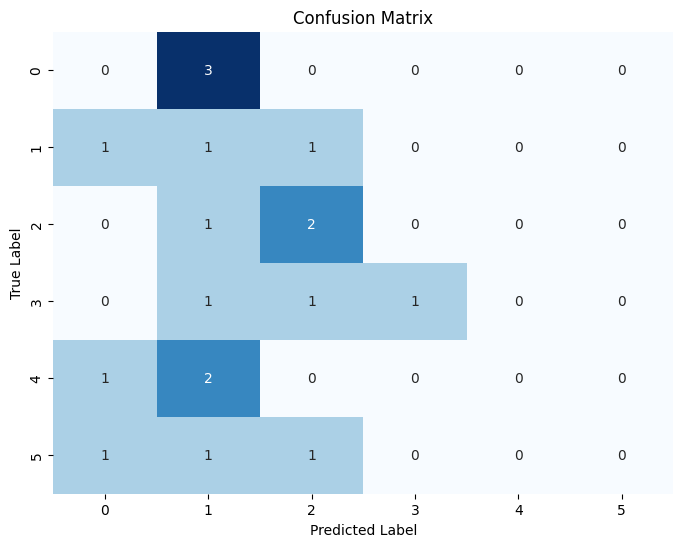

In [57]:

# Path to the Train directory
train_dir = os.path.abspath('Task 4 Datasets/4.2_Normalized_Datasets/Train')
test_dir = os.path.abspath('Task 4 Datasets/4.2_Normalized_Datasets/Test')
X_train_Normalized,y_train_Normalized = Combining_Datasets(train_dir)
X_test_Normalized, y_test_Normalized = Combining_Datasets(test_dir)

X_test_combined = pd.concat([X_train_Normalized, X_test_Normalized], ignore_index=True)
y_test_combined = pd.concat([y_train_Normalized, y_test_Normalized], ignore_index=True)
PreformanceDecisionTree(X_test_combined,y_test_combined,'DecisionTree_Raw_acc.pkl')
